# Importation des librairies et des données

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# les données dans seaborn

In [96]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [287]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [288]:
df=df.drop(['alive','who','embarked','class','deck'],axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


# Visualisation 

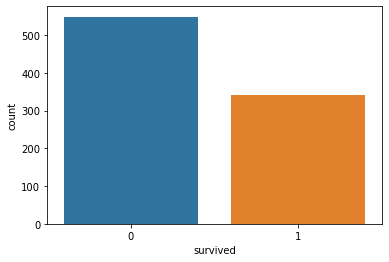

In [290]:
sns.countplot(x='survived',data=df);

In [291]:
df['survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

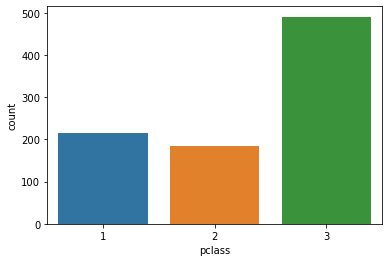

In [292]:
sns.countplot(x='pclass',data=df);

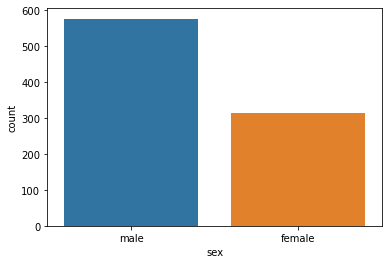

In [293]:
sns.countplot(x='sex',data=df);

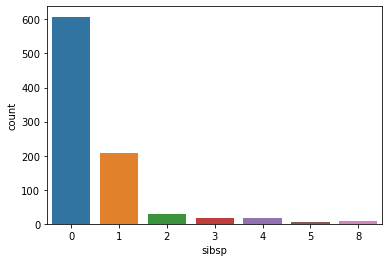

In [294]:
sns.countplot(x='sibsp',data=df);

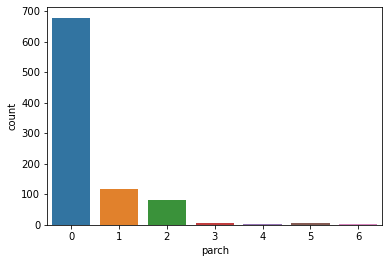

In [295]:
sns.countplot(x='parch',data=df);

<AxesSubplot:ylabel='fare'>

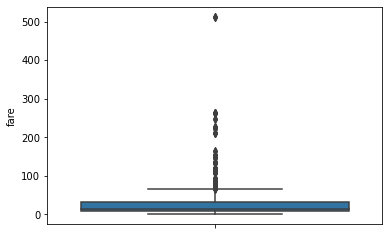

In [296]:
sns.boxplot(y='fare',data=df)

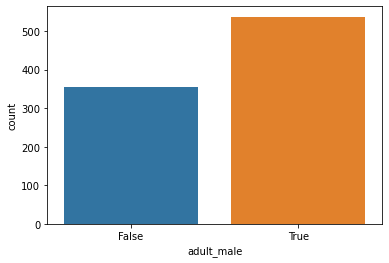

In [297]:
sns.countplot(x='adult_male',data=df);

# tableau de contingeant

In [298]:
pd.crosstab(df['sex'],df['adult_male'])

adult_male,False,True
sex,,
female,314,0
male,40,537


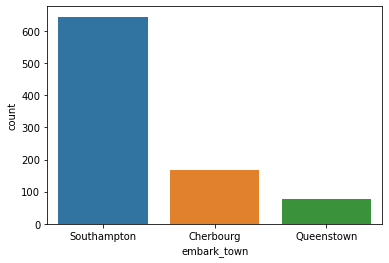

In [299]:
sns.countplot(x='embark_town',data=df);

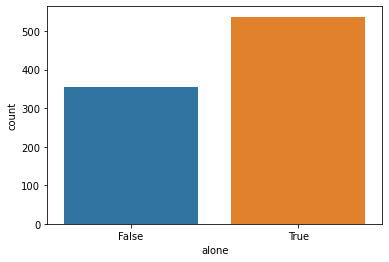

In [300]:
sns.countplot(x='alone',data=df);

<AxesSubplot:ylabel='age'>

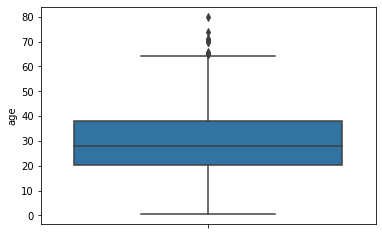

In [301]:
sns.boxplot(y='age',data=df)

/home/mathurin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

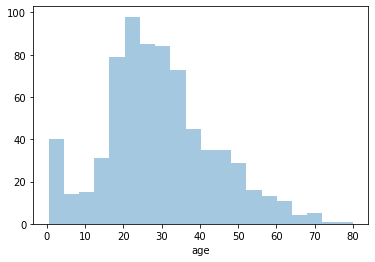

In [302]:
sns.distplot(df['age'],kde=False,bins=20)

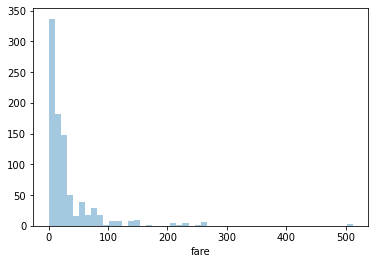

In [303]:
sns.distplot(df['fare'],kde=False);

# relation entre age et variable cible

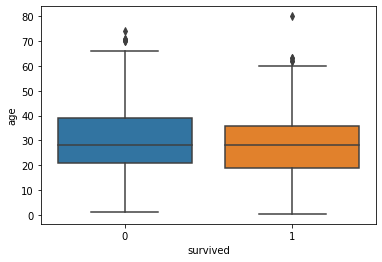

In [304]:
sns.boxplot(x='survived',y='age', data=df);

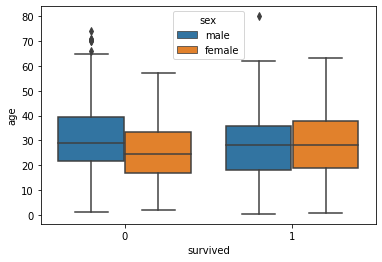

In [305]:
sns.boxplot(x='survived',y='age',hue='sex', data=df);

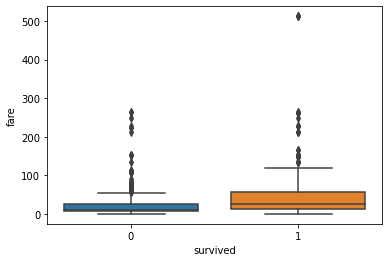

In [306]:
sns.boxplot(x='survived',y='fare',data=df);

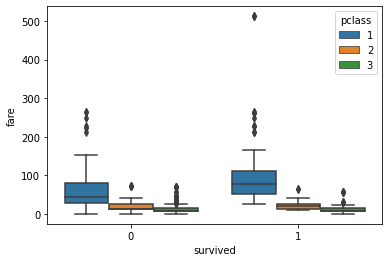

In [307]:
sns.boxplot(x='survived',y='fare',hue='pclass',data=df);

<AxesSubplot:xlabel='survived', ylabel='fare'>

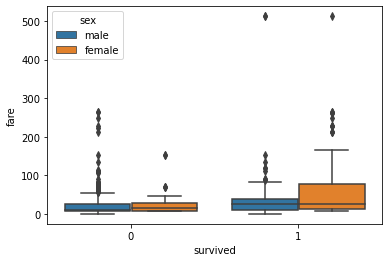

In [308]:
sns.boxplot(x='survived',y='fare',hue='sex',data=df)

In [309]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
df['fare'].quantile(0.99)

249.00622000000033

# Nettoyage des données

In [311]:
df.shape

(891, 10)

In [312]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [313]:
df.fillna(value={'age':df['age'].median()},inplace=True)

In [314]:
df['age'].std()

13.019696550973194

In [315]:
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

In [316]:
df.fillna(value={'embark_town':'Southampton'},inplace=True)

In [317]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

# Pour savoir si une value est est aberrante, voici la formule statistiquement.

# Valeur < Q1-1,5*IQR du valeur > Q3+1.5*IQR

In [318]:
def finding_outliers(data,variable_name):
    iqr=data[variable_name].quantile(0.75)-data[variable_name].quantile(0.25)
    lower=data[variable_name].quantile(0.25)-1.5*iqr
    upper= data[variable_name].quantile(0.75)+1.5*iqr
    return data[(data[variable_name]< lower)|(data[variable_name]>upper)]

In [319]:
finding_outliers(df,'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
336,0,1,male,29.0,1,0,66.6000,True,Southampton,False
151,1,1,female,22.0,1,0,66.6000,False,Southampton,False
369,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
641,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
846,0,3,male,28.0,8,2,69.5500,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.0,3,2,263.0000,True,Southampton,False
341,1,1,female,24.0,3,2,263.0000,False,Southampton,False
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg,True


In [320]:
iqr_fare=df['fare'].quantile(0.75)-df['fare'].quantile(0.25)
df['fare'].quantile(0.75)+1.5*iqr_fare

65.6344

In [321]:
df.loc[(finding_outliers(df,'fare').index,'fare')]=df['fare'].quantile(0.75)+1.5*iqr_fare

<AxesSubplot:ylabel='fare'>

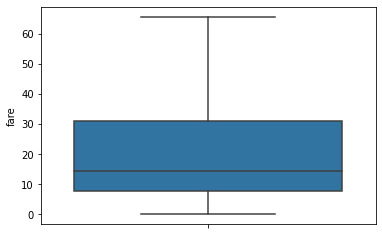

In [322]:
sns.boxplot(y='fare',data=df)

In [323]:
df['age'].quantile(0.25)-1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25))

2.5

In [324]:
df['age'].quantile(0.75)+1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25))

54.5

In [325]:
finding_outliers(df,'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [326]:
df.loc[df['age']<df['age'].quantile(0.25)-1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25)),
       'age']=df['age'].quantile(0.25)-1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25))

df.loc[df['age']>df['age'].quantile(0.75)+1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25)),
       'age']=df['age'].quantile(0.75)+1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25))

<AxesSubplot:ylabel='age'>

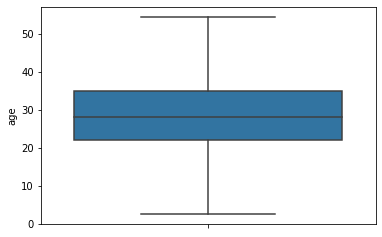

In [327]:
sns.boxplot(y='age',data=df)

In [328]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


# Preparation des donnees

In [329]:
df['sex'].replace({'female':0,'male':1},inplace=True)

In [330]:
df['alone']=df['alone'].astype('int')
df['adult_male']=df['adult_male'].astype('int')

In [331]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [332]:
embark_dummies=pd.get_dummies(df['embark_town'],drop_first=True)
embark_dummies

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [333]:
df=pd.concat([df,embark_dummies],axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,Southampton,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,Southampton,1,0,1
887,1,1,0,19.0,0,0,30.0000,0,Southampton,1,0,1
888,0,3,0,28.0,1,2,23.4500,0,Southampton,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,Cherbourg,1,0,0


In [334]:
del df['embark_town']

In [335]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,0,1


In [337]:
df['family']=df['sibsp']+df['parch']
df.drop(['sibsp','parch'],axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0
3,1,1,0,35.0,53.1000,0,0,0,1,1
4,0,3,1,35.0,8.0500,1,1,0,1,0


# Division des donnees 60% train, 20 % validation, 20% test 

In [343]:
from sklearn.model_selection import train_test_split
seed=111
X=df.drop('survived',axis=1)
y=df['survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,
                                               random_state= seed,stratify=y)

X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,
                                               random_state= seed,stratify=y_test)

In [344]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [345]:
y_train.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [346]:
y_val.value_counts(normalize=True)

0    0.617978
1    0.382022
Name: survived, dtype: float64

In [347]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: survived, dtype: float64

# NOrmalisation

# Methode de sur-echantillonge (upsampling)

In [349]:
from sklearn.utils import resample
X2=X_train
X2['survived']=y_train.values
X2.head()

<ipython-input-349-1df635965cdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['survived']=y_train.values


,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
151,1,0,22.0,65.6344,0,0,0,1,1,1
149,2,1,42.0,13.0000,1,1,0,1,0,0


In [351]:
minority=X2[X2.survived==1]
majority=X2[X2.survived==0]

minority_upsampled=resample(minority,replace=True,n_samples=len(majority))
minority_upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
720,2,0,6.0,33.0000,0,0,0,1,1,1
394,3,0,24.0,16.7000,0,0,0,1,2,1
669,1,0,28.0,52.0000,0,0,0,1,1,1
151,1,0,22.0,65.6344,0,0,0,1,1,1
447,1,1,34.0,26.5500,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
706,2,0,45.0,13.5000,0,1,0,1,0,1
830,3,0,15.0,14.4542,0,0,0,0,1,1
510,3,1,29.0,7.7500,1,1,1,0,0,1
306,1,0,28.0,65.6344,0,1,0,0,0,1


In [354]:
majority.shape

(329, 10)

In [355]:
upsampled=pd.concat([majority,minority_upsampled])
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
149,2,1,42.0,13.0000,1,1,0,1,0,0
249,2,1,54.0,26.0000,1,0,0,1,1,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
706,2,0,45.0,13.5000,0,1,0,1,0,1
830,3,0,15.0,14.4542,0,0,0,0,1,1
510,3,1,29.0,7.7500,1,1,1,0,0,1
306,1,0,28.0,65.6344,0,1,0,0,0,1


In [356]:
upsampled['survived'].value_counts(normalize=True)

0    0.5
1    0.5
Name: survived, dtype: float64

In [357]:
X_train_up=upsampled.drop('survived',axis=1)
y_train_up=upsampled['survived']

# Methode de sous-echantillonnage

In [358]:
majority_downsampled=resample(majority,replace=False,n_samples=len(minority))
majority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
860,3,1,41.0,14.1083,1,0,0,1,2,0
728,2,1,25.0,26.0000,1,0,0,1,1,0
534,3,0,30.0,8.6625,0,1,0,1,0,0
336,1,1,29.0,65.6344,1,0,0,1,1,0
560,3,1,28.0,7.7500,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
349,3,1,42.0,8.6625,1,1,0,1,0,0
404,3,0,20.0,8.6625,0,1,0,1,0,0
96,1,1,54.5,34.6542,1,1,0,0,0,0
284,1,1,28.0,26.0000,1,1,0,1,0,0


In [359]:
downsampled=pd.concat([minority,majority_downsampled])
downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
151,1,0,22.0,65.6344,0,0,0,1,1,1
788,3,1,2.5,20.5750,0,0,0,1,3,1
609,1,0,40.0,65.6344,0,1,0,1,0,1
697,3,0,28.0,7.7333,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
349,3,1,42.0,8.6625,1,1,0,1,0,0
404,3,0,20.0,8.6625,0,1,0,1,0,0
96,1,1,54.5,34.6542,1,1,0,0,0,0
284,1,1,28.0,26.0000,1,1,0,1,0,0


In [360]:
X_train_down=downsampled.drop(['survived'],axis=1)
y_train_down=downsampled['survived']

# Modelisation

## Selection de variable importante

In [361]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf= RandomForestClassifier(random_state=seed)

rf.fit(X_train_up,y_train_up)
accuracy_score(y_val,rf.predict(X_val))

0.7752808988764045

In [362]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.06357332 0.14368301 0.2132689  0.22455049 0.23552881 0.01351391
 0.00856359 0.01643522 0.08088276]


In [363]:
vars_imp=pd.Series(rf.feature_importances_,index=X_train_up.columns).sort_values(ascending=False)
vars_imp

adult_male     0.235529
fare           0.224550
age            0.213269
sex            0.143683
family         0.080883
pclass         0.063573
Southampton    0.016435
alone          0.013514
Queenstown     0.008564
dtype: float64

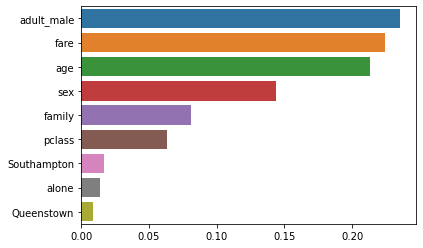

In [364]:
sns.barplot(x=vars_imp,y=vars_imp.index)
plt.show()

In [365]:
vars_non_imp=['Queenstown']
X_train_up=X_train_up.drop(vars_non_imp,axis=1)
X_val=X_val.drop(vars_non_imp,axis=1)
X_test=X_test.drop(vars_non_imp,axis=1)

# Regression logistique

In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr =LogisticRegression(random_state=seed,max_iter=500)

lr_hyp={'C':[0.001,0.01,0.1,1,10,100]}

lr_cv=GridSearchCV(lr,lr_hyp,cv=5)

lr_cv.fit(X_train_up,y_train_up)

print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

0.851087207957437
LogisticRegression(C=1, max_iter=500, random_state=111)


# Forest aleatoire

In [371]:
Rf=RandomForestClassifier(random_state=seed)

Rf_hyp={'n_estimators':[5,10,20,50,100,200],'max_depth':[None,2,5,10,15,20]}

Rf_cv=GridSearchCV(Rf,Rf_hyp,cv=5)

Rf_cv.fit(X_train_up,y_train_up)

print(Rf_cv.best_score_)
print(Rf_cv.best_estimator_)

0.8906083738144807
RandomForestClassifier(max_depth=10, random_state=111)


# SVM

In [372]:
from sklearn.svm import SVC


sv=SVC(random_state=seed)

sv_hyp={'C':[0.1,1,10],'kernel':['linear','rbf']}


svm_cv=GridSearchCV(sv,sv_hyp,cv=5)


svm_cv.fit(X_train_up,y_train_up)

print(svm_cv.best_score_)
print(svm_cv.best_estimator_)

0.852613925514689
SVC(C=1, kernel='linear', random_state=111)


# Bagging Classifier

In [373]:
from sklearn.ensemble import BaggingClassifier

bc= BaggingClassifier(random_state=seed)

bc_hyp={'n_estimators':[5,10,20,50,100,200]}

bc_cv=GridSearchCV(bc,bc_hyp,cv=5)

bc_cv.fit(X_train_up,y_train_up)

print(bc_cv.best_score_)
print(bc_cv.best_estimator_)

0.8890353920888273
BaggingClassifier(n_estimators=50, random_state=111)


# Evaluation des performances et choix du modeles

In [383]:
def model_evaluation(model,features,labels):
    pred=model.predict(features)
    score=accuracy_score(y_val,pred)
    print('Score global du modele:', round(score,3))
    

In [384]:
models=[lr_cv.best_estimator_,Rf_cv.best_estimator_,svm_cv.best_estimator_,bc_cv.best_estimator_]

for model in models:
    print('Modele ' + str(model))
    model_evaluation(model,X_val,y_val)
    print('_'*90)

Modele LogisticRegression(C=1, max_iter=500, random_state=111)
Score global du modele: 0.77
__________________________________________________________________________________________
Modele RandomForestClassifier(max_depth=10, random_state=111)
Score global du modele: 0.764
__________________________________________________________________________________________
Modele SVC(C=1, kernel='linear', random_state=111)
Score global du modele: 0.77
__________________________________________________________________________________________
Modele BaggingClassifier(n_estimators=50, random_state=111)
Score global du modele: 0.77
__________________________________________________________________________________________


# Performance du meilleur modele sur les donnees text

In [385]:
accuracy_score(y_test,Rf_cv.best_estimator_.predict(X_test))

0.8435754189944135

In [386]:
accuracy_score(y_test,lr_cv.best_estimator_.predict(X_test))

0.7877094972067039

In [387]:
accuracy_score(y_test,svm_cv.best_estimator_.predict(X_test))

0.8044692737430168

In [388]:
accuracy_score(y_test,bc_cv.best_estimator_.predict(X_test))

0.8268156424581006